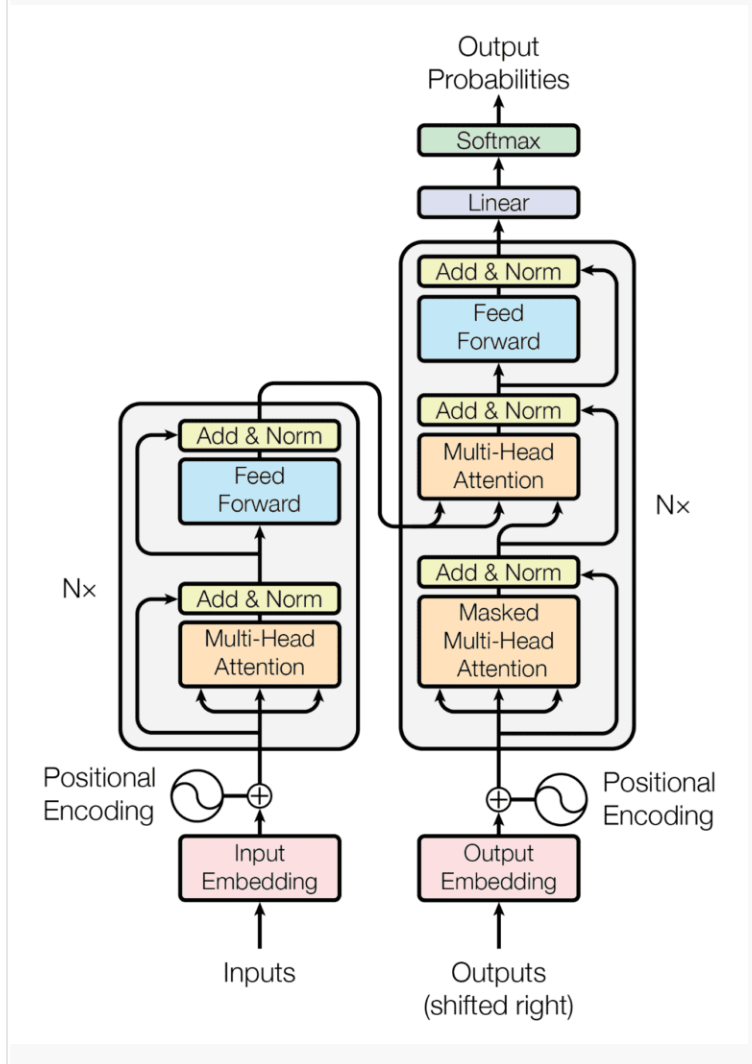

In [1]:
import torch.nn as nn

In [2]:
class PositionwiseFeedForward(nn.Module):
  def __init__(self, d_model, hidden, dropout=0.1):
    super(PositionwiseFeedForward, self).__init__()
    self.fc1=nn.linear(d_model, hidden)
    self.fc2=nn.linear(hidden, d_model)
    self.dropout = nn.Dropout(dropout)
  def forward(self, x):
    x=self.fc1(x)
    x=F.relu(x)
    x=self.dropout(x)
    x=self.fc2(x)
    return x

In [4]:
class EncoderLayer(nn.Module):
  def __init__(self, d_model, ffn_hidden, n_head, dropout = 0.1):
    super(EncoderLayer, self).__init__()
    self.attemtopm=nn.MultiheadAttention(d_model, n_head)
    self.norm1 =nn.LayerNorm(d_model)
    self.dropout=nn.Dropout(dropout)
    self.ffn=PositionwiseFeedForward(d_model, ffn_hidden, dropout)
    self.norm2 =nn.LayerNorm(d_model)
    self.dropout2=nn.Dropout(dropout)
  def forward(self, x, mask = None):
    _x=x
    x=self.attention(x,x,x,mask)
    x=self.dropout(x)
    x=self.norm1(x+_x)
    _x=x
    x=self.ffn(x)
    x=self.dropout2(x)
    x=self.norm2(x+_x)
    return x


In [6]:
class Encoder(nn.Module):
    def __init__(self, vocab_size, max_len, d_model, ffn_hidden, n_head, n_layer, dropout=0.1, device='cpu'):
        super(Encoder, self).__init__()

        # Embedding layer: vocab_size -> d_model
        self.embedding = nn.Embedding(vocab_size, d_model)

        # Positional encoding (you'll need to add this)
        self.pos_encoding = PositionalEncoding(d_model, max_len, dropout, device)

        # Stack of encoder layers
        self.layers = nn.ModuleList([
            EncoderLayer(d_model, ffn_hidden, n_head, dropout, device)
            for _ in range(n_layer)
        ])

    def forward(self, x, s_mask):
        # Apply embedding
        x = self.embedding(x)

        # Apply positional encoding
        x = self.pos_encoding(x)

        # Pass through encoder layers
        for layer in self.layers:
            x = layer(x, s_mask)

        return x